In [17]:
import pandas as pd

In [18]:
import matplotlib.pyplot as plt

In [11]:
df_cities = pd.read_csv('cities_coordinates_DEMO.csv')
print(df_cities.head())

  LocationName  LocationX  LocationY
0         Arad         91        492
1    Bucharest        400        327
2      Craiova        253        288
3      Drobeta        165        299
4       Eforie        562        293


In [ ]:
df_matrix = pd.read_csv('cities_correlation_matrix._DEMOcsv')
print(df_matrix)

In [ ]:
'''
Dictionary stores location of cities and their locations
'''
cities = {}

name = df_cities["LocationName"]
locationX = df_cities["LocationX"]
locationY = df_cities["LocationY"]

location = zip(locationX, locationY)

for x1, x2 in zip(name, location):
    cities.update({x1:x2})

cities # Output the dictionary

In [21]:
import networkx as nx

In [ ]:
neighbours = []

for i in range(df_matrix.shape[0]):
    x = df_matrix.iloc[i, :]

    relationKey = (x.iloc[0])

    for j in range(1, df_matrix.shape[1]):
        if (j < i) and (x.iloc[j] != 0):
            temp_tuple = (relationKey, df_matrix.columns[j], x.iloc[j])
            neighbours.append(temp_tuple)

print(neighbours)

In [60]:
Graph = nx.Graph()

Graph.add_weighted_edges_from(neighbours)

source = 'Timisoara'

goal = 'Hirsova'

In [58]:
'''
Implements a Depth-First-Search (DFS) algorithm to enumerate the shortest distance between two chosen cities: "Arad" and "Bucharest"
'''

from collections import deque

def dfs_path(Graph, initial_state, destination_state) -> tuple[list[int], int]:
    """Finds a path from initial to destination state using DFS and returns the path and its distance"""
    stack = deque([(initial_state, [initial_state], 0)])
    visited = set()

    while stack:
        (vertex, path, current_distance) = stack.pop()
        if vertex in visited:
            continue
        visited.add(vertex)

        new_nodes = []
        for element in Graph[vertex]:
            new_nodes.append((element, Graph[vertex][element]['weight']))
        new_nodes.reverse()
        for neighbour, weight in new_nodes:
            if neighbour in visited:
                continue
            if neighbour == destination_state:
                return path + [neighbour], current_distance + weight
            stack.append((neighbour, path + [neighbour], current_distance + weight))

    return None, float('inf')

In [64]:
# path = dfs_path(Graph, source, goal)
path, distance = dfs_path(Graph, source, goal)

print(f"The shortest path from {source} to {goal} is: {path}, with distance {int(distance)} KM")

The shortest path from Timisoara to Hirsova is: ['Timisoara', 'Arad', 'Sibiu', 'Fagaras', 'Bucharest', 'Urziceni', 'Hirsova'], with distance 751 KM


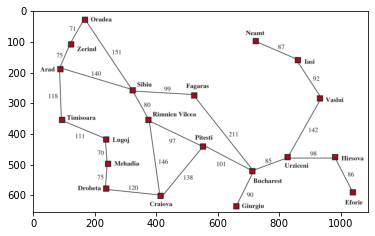

In [47]:
romania_map_image = plt.imread('Romania-map_DEMO.PNG')
plt.imshow(romania_map_image)